In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("resnet18_3d_seg.csv")
df

,train_loss,val_loss,fbeta_0.20,fbeta_0.25,fbeta_0.30,fbeta_0.35,fbeta_0.40,fbeta_0.45,fbeta_0.50,fbeta_0.55,fbeta_0.60,fbeta_0.65,fbeta_0.70,fbeta_0.75,fbeta_0.80,fbeta_0.85,fbeta_0.90,fbeta_0.95,epoch
0,0.686315,0.712914,0.160853,0.160853,0.160853,0.160853,0.160853,0.200552,0.002338,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.677728,0.695041,0.160933,0.160933,0.160933,0.160933,0.203857,0.239790,0.187596,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,2
2,0.668104,0.676237,0.160861,0.160861,0.160861,0.199312,0.225166,0.248561,0.184107,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,3
3,0.668540,0.652960,0.160976,0.196402,0.215850,0.231305,0.240269,0.249891,0.236705,0.069746,0.001506,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,4
4,0.670892,0.711314,0.161317,0.161317,0.161621,0.184563,0.219185,0.238283,0.246030,0.242113,0.109758,0.003229,0.0,0.0,0.0,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,0.630957,0.588154,0.246204,0.252605,0.255165,0.260668,0.282526,0.006571,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,173
173,0.629014,0.594029,0.245134,0.252698,0.254569,0.257892,0.268037,0.089404,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,174
174,0.630083,0.596395,0.244416,0.252490,0.254568,0.257287,0.263911,0.090621,0.000040,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,175
175,0.634658,0.593297,0.245590,0.252667,0.254756,0.257606,0.264604,0.081287,0.000466,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,176


(0.35, 0.65)

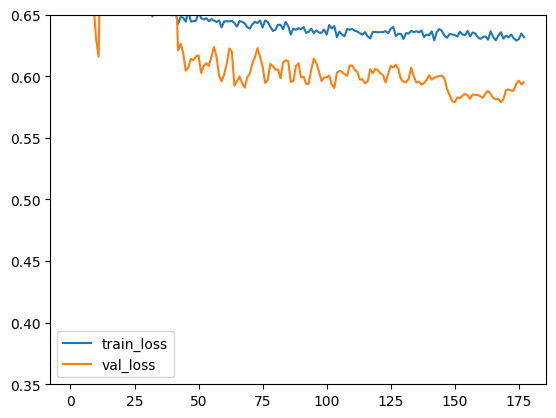

In [28]:
plt.plot(df["epoch"], df["train_loss"], label="train_loss")
plt.plot(df["epoch"], df["val_loss"], label="val_loss")
# plot the moving average of the validation loss
# plt.plot(df["epoch"], df["val_loss"].rolling(20).mean(), label="val_loss")

plt.legend()
plt.ylim(0.35, 0.65)

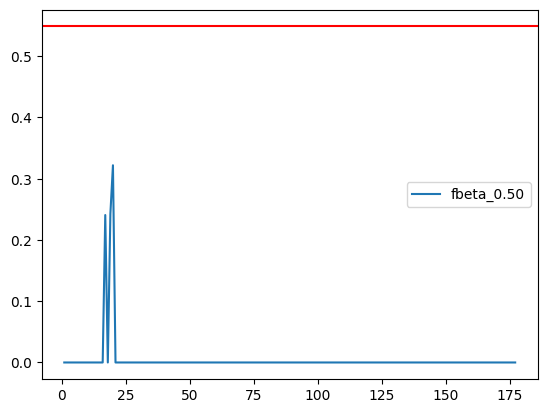

In [22]:
plt.plot(df["epoch"], df["fbeta_0.95"], label="fbeta_0.50")
# plt.plot(df["epoch"], df["fbeta_0.95"].rolling(20).mean(), label="fbeta_0.50")


# set horizontal line at 0.5486
plt.axhline(y=0.5486, color='r', linestyle='-')

plt.legend()
# plt.ylim(0.4, 1)


(177, 16)


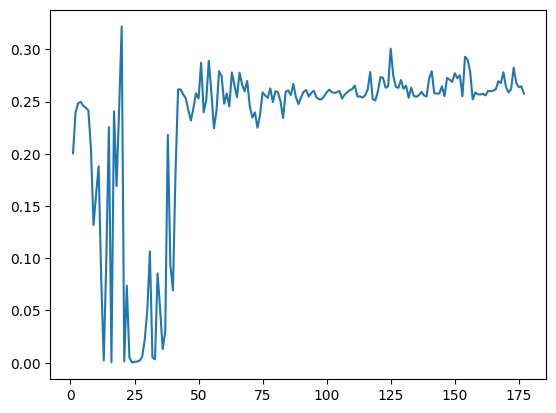

In [23]:
# take columns that start with "fbeta_"
df_fbeta = df.filter(regex=("fbeta_.*")).values
print(df_fbeta.shape)
df_fbeta = np.max(df_fbeta, axis=1)
plt.plot(df["epoch"], df_fbeta, label="fbeta_max")

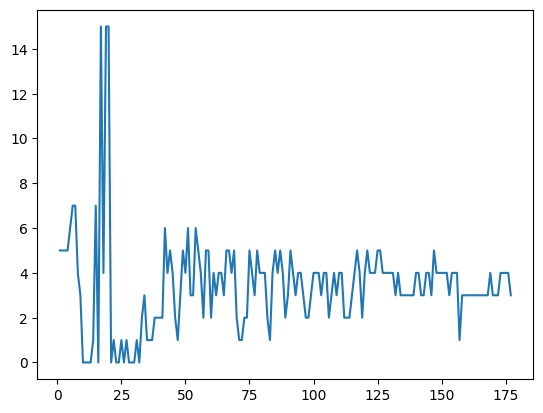

In [24]:
# take columns that start with "fbeta_"
df_fbeta = df.filter(regex=("fbeta_.*")).values
df_fbeta = np.argmax(df_fbeta, axis=1)
df_fbeta.shape
plt.plot(df["epoch"], df_fbeta, label="fbeta_max")

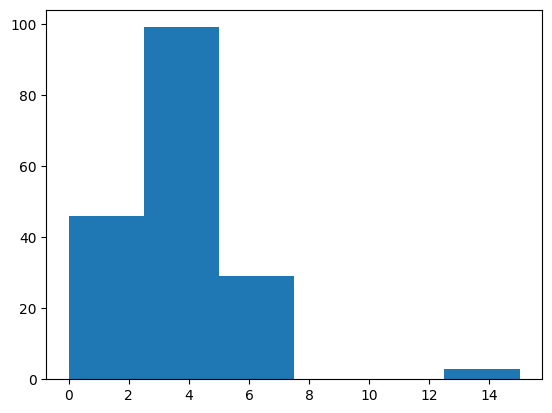

In [25]:
plt.hist(df_fbeta, bins=6);